# Prediction Model of the Energy Consumption in France - Playing around with the models

## Libraries

In [11]:
# pip install xgboost

     |████████████████████████████████| 1.8 MB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Importing libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import pickle

# Loading the models

In [24]:
# Loading the model :
model_XGBoost = pickle.load(open('model_XGBoost.pkl', 'rb'))

## Importing the data and fixing some data types

In [3]:
# Importing dataset :

df = pd.read_csv('/Users/adel/Desktop/Final-Project---IronHack-Paris/MySQL/MySQL Extract (Insights)/merged_dataset_final.csv')
df.head()

,Datetime,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
0,2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
1,2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2,2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
3,2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
4,2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182592 entries, 0 to 182591
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Datetime                           182592 non-null  object 
 1   date                               182592 non-null  object 
 2   Year                               182592 non-null  int64  
 3   Month                              182592 non-null  int64  
 4   Day                                182592 non-null  int64  
 5   Hour                               182592 non-null  int64  
 6   Weekday                            182592 non-null  int64  
 7   Consumption (MW)                   182592 non-null  int64  
 8   Fuel oil (MW)                      182592 non-null  int64  
 9   Coal (MW)                          182592 non-null  int64  
 10  Gas (MW)                           182592 non-null  int64  
 11  Nuclear (MW)                       1825

In [5]:
# Converting datetime column to datetime and date column to date :

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.shape

(182592, 28)

In [7]:
# Checking the time range of the dataset :

print('The dataset starts from {} and ends at {}'.format(df['Datetime'].min(), df['Datetime'].max()))

The dataset starts from 2012-01-01 00:00:00 and ends at 2022-05-31 23:30:00


In [8]:
# Putting datetime as index :

df = df.set_index('Datetime')
df.head()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,3834,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,3832,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,3839,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


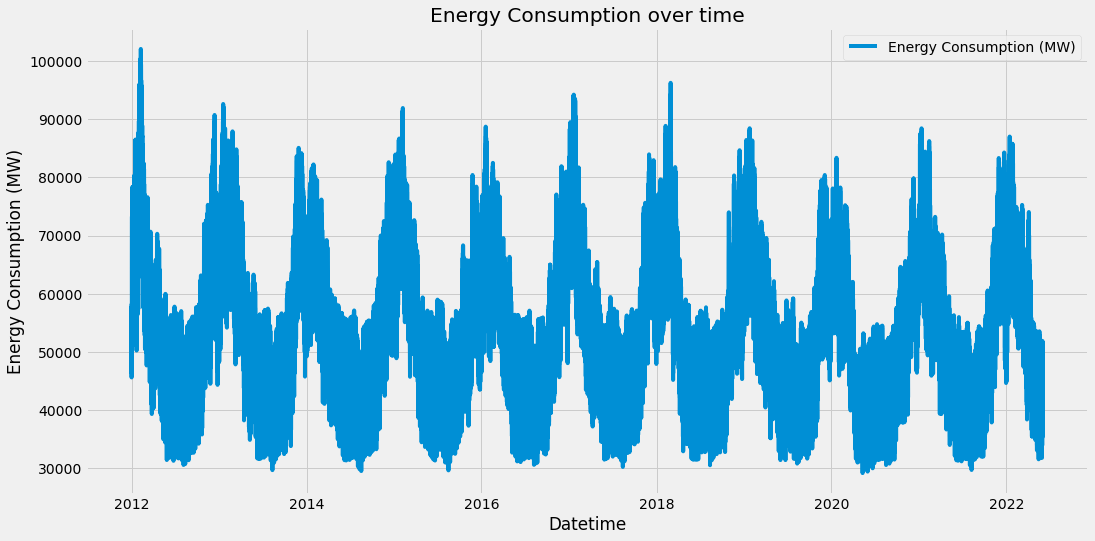

In [9]:
# Plotting the energy consumption over datetime :

plt.figure(figsize=(16,8))
plt.plot(df['Consumption (MW)'], label='Energy Consumption (MW)')
plt.title('Energy Consumption over time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.legend(loc='best')
plt.show()

We can see that there is an seasonal pattern.

## Feature Creation

In [10]:
# Creating new features from datetime in order to use them in the model :

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    return df

df = create_features(df)

## Lag Features

In [11]:
# We are going to modify the dataset in order to use it in the model but we are going to keep the original dataset :
df_XGBoost = df.copy()
df_XGBoost.head()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C),quarter,dayofyear,weekofyear
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,-862,-2625,-2940,1,11.7,4.6,7.1,1,1,52
2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,3816,...,-862,-2625,-2940,1,11.7,4.6,7.1,1,1,52
2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,3834,...,-862,-2625,-2714,1,11.7,4.6,7.1,1,1,52
2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,3832,...,-862,-2625,-2714,1,11.7,4.6,7.1,1,1,52
2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,3839,...,-862,-2327,-1088,1,11.7,4.6,7.1,1,1,52


In [12]:
# Creating a function to add lags :
def add_lags(df_XGBoost):
    target_map = df_XGBoost['Consumption (MW)'].to_dict()
    df_XGBoost['lag1'] = (df_XGBoost.index - pd.Timedelta('364 days')).map(target_map)
    df_XGBoost['lag2'] = (df_XGBoost.index - pd.Timedelta('728 days')).map(target_map)
    df_XGBoost['lag3'] = (df_XGBoost.index - pd.Timedelta('1092 days')).map(target_map)
    return df_XGBoost

# Thes lags are the energy consumption of the same day of the Y-1, Y-2 and Y-3. It is useful to predict the energy consumption of the next day.
# Usely, the energy consumption of the next day is similar to the energy consumption of the same day of the previous year.

In [13]:
# Adding lags : 
df_XGBoost = add_lags(df_XGBoost)

In [14]:
# Checking the new dataset :
df_XGBoost.tail()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C),quarter,dayofyear,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-31 21:30:00,2022-05-31,2022,5,31,21,1,44043,83,454,4025,...,0,16.7,17.4,-0.7,2,151,22,43659.0,42167.0,44606.0
2022-05-31 22:00:00,2022-05-31,2022,5,31,22,1,44019,82,274,3908,...,0,16.7,17.4,-0.7,2,151,22,43570.0,42337.0,44749.0
2022-05-31 22:30:00,2022-05-31,2022,5,31,22,1,45067,83,192,3879,...,0,16.7,17.4,-0.7,2,151,22,44515.0,43545.0,45823.0
2022-05-31 23:00:00,2022-05-31,2022,5,31,23,1,46703,81,3,3933,...,0,16.7,17.4,-0.7,2,151,22,46444.0,45958.0,48011.0
2022-05-31 23:30:00,2022-05-31,2022,5,31,23,1,45279,82,2,3748,...,0,16.7,17.4,-0.7,2,151,22,45579.0,45418.0,47209.0


## Predict the Future

In [15]:
df_XGBoost.index.max()

Timestamp('2022-05-31 23:30:00')

In [16]:
# Create future dataframe
future = pd.date_range('2022-06-01','2032-06-02', freq='30min') # 10 years of data with 30 minutes frequency
future_df = pd.DataFrame(index=future) # create a dataframe with the future dates
future_df['isFuture'] = True # add a column to indicate that the data is from the future 
df_XGBoost['isFuture'] = False # add a column to indicate that the data is from the past
df_and_future = pd.concat([df_XGBoost, future_df]) # concatenate the past and future dataframes
df_and_future = create_features(df_and_future) # create features for the future dataframe
df_and_future = add_lags(df_and_future) # add lags to the future dataframe to predict the energy consumption of the next day

In [17]:
df_and_future.columns

Index(['date', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Consumption (MW)',
       'Fuel oil (MW)', 'Coal (MW)', 'Gas (MW)', 'Nuclear (MW)', 'Wind (MW)',
       'Solar (MW)', 'Hydroelectric (MW)', 'Pumped storage (MW)',
       'Bioenergy (MW)', 'Physical exchanges (MW)',
       'CO2 emissions intensity (g/kWh)', 'Trading with England (MW)',
       'Trading with Spain (MW)', 'Trading with Italy (MW)',
       'Trading with Switzerland (MW)', 'Trading with Germany-Belgium (MW)',
       'Flag Holiday', 'Average temperature (°C)',
       'Reference temperature (°C)', 'Temperature Deviation (°C)', 'quarter',
       'dayofyear', 'weekofyear', 'lag1', 'lag2', 'lag3', 'isFuture'],
      dtype='object')

In [18]:
df_and_future.tail()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C),quarter,dayofyear,weekofyear,lag1,lag2,lag3,isFuture
2032-06-01 22:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-01 22:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-01 23:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-01 23:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-02 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,154,23,NaN,NaN,NaN,True


In [19]:
future_w_features = df_and_future.query('isFuture').copy() # creating a dataframe with the future dates

In [27]:
future_w_features.tail()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C),quarter,dayofyear,weekofyear,lag1,lag2,lag3,isFuture
2032-06-01 22:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-01 22:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-01 23:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-01 23:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,153,23,NaN,NaN,NaN,True
2032-06-02 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,154,23,NaN,NaN,NaN,True


In [28]:
FEATURES = ['Year', 'Month', 'Day', 'Hour', 'Weekday','Flag Holiday', 'Average temperature (°C)',
        'Reference temperature (°C)', 'Temperature Deviation (°C)', 'quarter', 'dayofyear', 'weekofyear', 'lag1','lag2','lag3']
TARGET = 'Consumption (MW)'

## Predicting With XGBoost Model

In [29]:
future_w_features['pred'] = model_XGBoost.predict(future_w_features[FEATURES])

In [30]:
future_w_features.tail()

,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Reference temperature (°C),Temperature Deviation (°C),quarter,dayofyear,weekofyear,lag1,lag2,lag3,isFuture,pred
2032-06-01 22:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,153,23,NaN,NaN,NaN,True,83191.757812
2032-06-01 22:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,153,23,NaN,NaN,NaN,True,83191.757812
2032-06-01 23:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,153,23,NaN,NaN,NaN,True,83191.757812
2032-06-01 23:30:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,153,23,NaN,NaN,NaN,True,83191.757812
2032-06-02 00:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,154,23,NaN,NaN,NaN,True,83191.757812


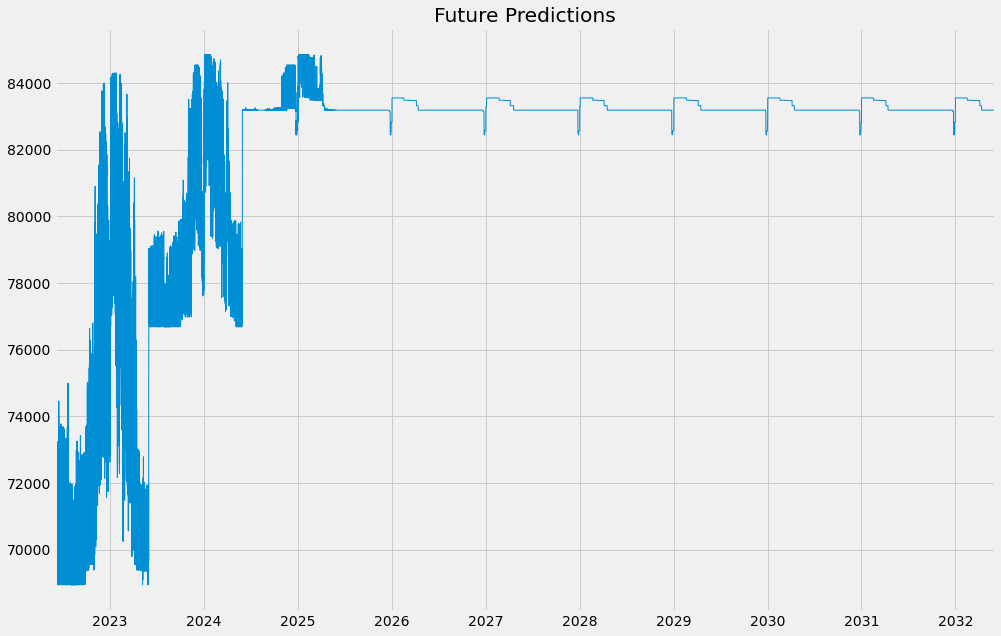

In [31]:
# Plotting the predictions :
future_w_features['pred'].plot(figsize=(15, 10),
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

Obviously this is not working for 10 years forcasting

## Predicting With Prophet Model